In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import time

In [3]:
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt),'%d/%m/%Y %H:%M:%S')
    return(t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

In [4]:
path = 'household_power_consumption_small.txt'
names = ['Date','Time','Global_active_power','Globel_reactive_power','Voltage','Global_intensity','Sub_metering_1','SUb_metering_2','Sub_metering_3']

In [5]:
df = pd.read_csv(path,sep=';')

In [6]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [7]:
new_df = df.replace('?',np.nan)
datas = new_df.dropna(how='any')

In [8]:
X = datas[names[0:2]]
X = X.apply(lambda x :pd.Series(date_format(x)), axis=1)
Y = datas[names[4]]

In [9]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [10]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train,Y_train)

LinearRegression()

In [13]:
y_predict = lr.predict(X_test)

In [14]:
TC=lr.score(X_test,Y_test)
print('TC:\n',TC)

TC:
 0.27923178240564306


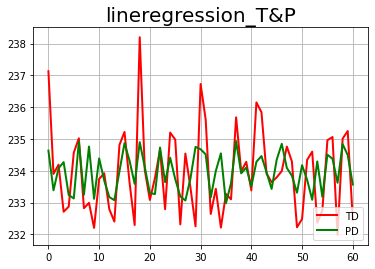

In [15]:
t=np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t,Y_test,'r-',linewidth=2,label=u'TD')
plt.plot(t,y_predict,'g-',linewidth=2,label=u'PD')
plt.legend(loc = 'lower right')
plt.title(u'lineregression_T&P',fontsize=20)
plt.grid(b=True)
plt.show()

In [16]:
print(len(X_test),len(X_train))

61 141
